# Pymaceuticals Inc.
---

### Analysis

- This project studies the test results from 249 mice that were given 10 different drug treatments. One of the drugs was a placebo drug. This study analyzed the trends and patters of the experiment to determine what are the best drugs for anti-cancer drugs.
  
- Key Findings Suggests:
- There is a strong correlation between the weight of the mice and the size of the tumors, with a correlation value of .84, meaning heavier mice tended to have larger tumors.
- Amongst the 4 drug regiments analyzed, Capomulin and Ramicane were the most effective at shrinking tumors.
- The two least effective drugs were Ifubinol and Ceftamin. 
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(
    mouse_metadata,
    study_results,
    how="right",
    on='Mouse ID')

# Display the data table for preview
combined_data = combined_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mice_count = len(combined_data['Mouse ID'].value_counts())

mice_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_ids = combined_data.loc[combined_data.duplicated(subset=
                                                                       ['Mouse ID', 'Timepoint',]),
                                                                        'Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_id = combined_data.loc[combined_data['Mouse ID'] == 'g989',]
duplicate_mice_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_minus_duplicates = combined_data[combined_data['Mouse ID'] != 'g989']

combined_data_minus_duplicates.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = combined_data_minus_duplicates['Mouse ID'].nunique()
print(clean_mice_count)

248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_statistics = combined_data_minus_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem')


# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame({'Mean Tumor Volume': summary_statistics['Mean'],
                                      'Median Tumor Volume': summary_statistics['Median'],
                                      'Tumor Volume Variance': summary_statistics['Variance'],
                                      'Tumor Volume Std. Dev.': summary_statistics['Standard_Deviation'],
                                      'Tumor Volume Std. Err.': summary_statistics['SEM']})

summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = combined_data_minus_duplicates.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

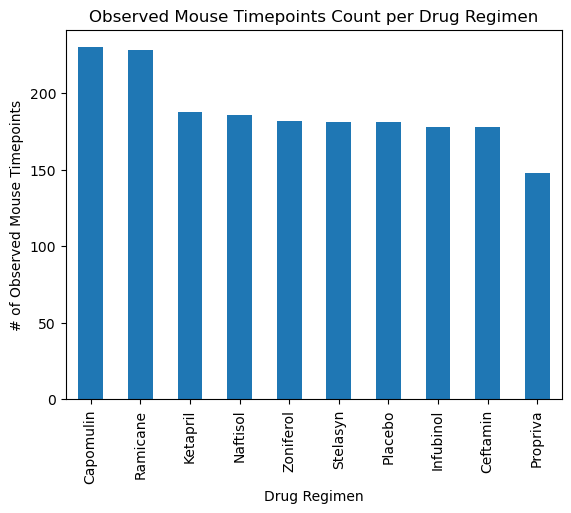

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_counts = combined_data_minus_duplicates['Drug Regimen'].value_counts()
mice_counts.plot(kind='bar', title='Observed Mouse Timepoints Count per Drug Regimen', ylabel='# of Observed Mouse Timepoints', xlabel='Drug Regimen',)
plt.show()

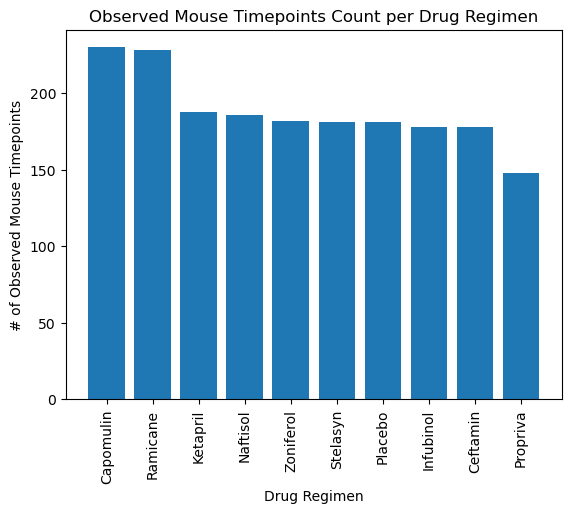

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_counts.index.values
y_axis = mice_counts.values

plt.bar(x_axis, y_axis,
       alpha=1, align='center')  

plt.title('Observed Mouse Timepoints Count per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

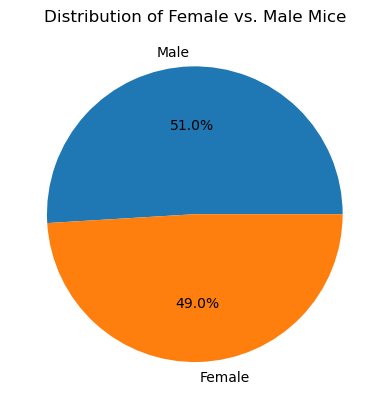

In [14]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_data = combined_data_minus_duplicates['Sex'].value_counts()
gender_data.plot(kind='pie', autopct='%1.1f%%', labels=['Male', 'Female'])
plt.title('Distribution of Female vs. Male Mice')

# Don't show y-axis
plt.ylabel('')
               
# Make the pie chart
plt.show()

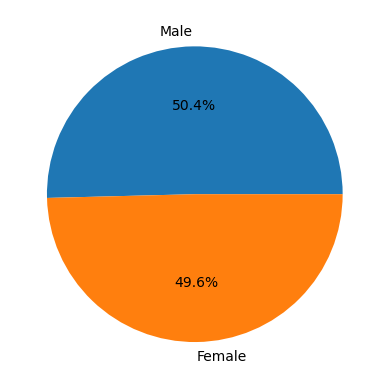

In [15]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = combined_data_minus_duplicates.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint = combined_data.groupby(['Mouse ID']).max()
mouse_timepoint_reset = mouse_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_combined_df = mouse_timepoint_reset[['Mouse ID', 'Timepoint']].\
    merge(combined_data,on=['Mouse ID', 'Timepoint'],how="left")

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Last (max) timepoint for each mouse
max_timepoint_by_mouse = combined_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merging data to get last timepoint for each mouse
combined_data = max_timepoint_by_mouse.merge(combined_data, on=['Mouse ID', 'Timepoint'], how="left")

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = {treatment:[] for treatment in treatments}
tumor_volumes_by_treatment = []

# Locate the rows which contain mice on each drug and get the tumor volumes
def find_outliers_for_regimen(regimen):
    tumor_volumes = combined_data.loc[combined_data['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    first_quart = tumor_volumes.quantile(.25)
    third_quart = tumor_volumes.quantile(0.75)
    iqr = third_quart - first_quart
    
    # Determine outliers using upper and lower bounds
    lower_bound = first_quart - 1.5 * iqr
    upper_bound = third_quart + 1.5 * iqr

    #Indentifying the outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    # Print and return results
    print(f"{regimen}'s potential outliers:\n{outliers}\n")
    return tumor_volumes

# Call function for every regimen
capomulin_data = find_outliers_for_regimen('Capomulin')
ramicane_data = find_outliers_for_regimen('Ramicane')
infubinol_data = find_outliers_for_regimen('Infubinol')
ceftamin_data = find_outliers_for_regimen('Ceftamin')


Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)



/var/folders/cg/5nkbpx6j5r1brtzy2mxr3ms00000gn/T/ipykernel_79387/615664209.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([capomulin_data, ramicane_data, infubinol_data, ceftamin_data], labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],flierprops= red_pointer)


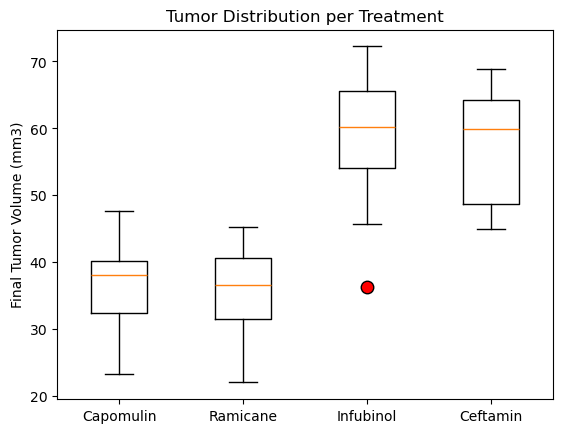

In [18]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
red_pointer = dict(markerfacecolor = "red", markersize= 9)
plt.boxplot([capomulin_data, ramicane_data, infubinol_data, ceftamin_data], labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],flierprops= red_pointer)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Distribution per Treatment')

plt.show()

## Line and Scatter Plots

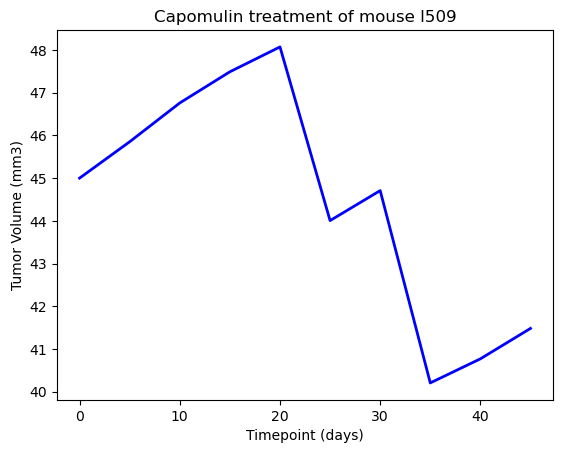

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_treatment_data = combined_data_minus_duplicates.loc[combined_data_minus_duplicates['Drug Regimen'] == 'Capomulin',]
mouse_id = 'l509'

# Sort data by Timepoint
forline_df = capomulin_mouse_treatment_data.loc[capomulin_mouse_treatment_data['Mouse ID'] == 'l509',:]
x_axis = forline_df['Timepoint']
tumor_size = forline_df['Tumor Volume (mm3)']

# Generate line plot
fig, ax = plt.subplots()
ax.plot(x_axis, tumor_size, linewidth=2, label='Fahreneit', color='blue')

#Labels & Titles
ax.set_xlabel('Timepoint (days)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title(f'Capomulin treatment of mouse {mouse_id}')

plt.show()

Text(0.5, 1.0, 'Mouse Weight vs Average Tumor Volume Correlation for Capomulin Regimen')

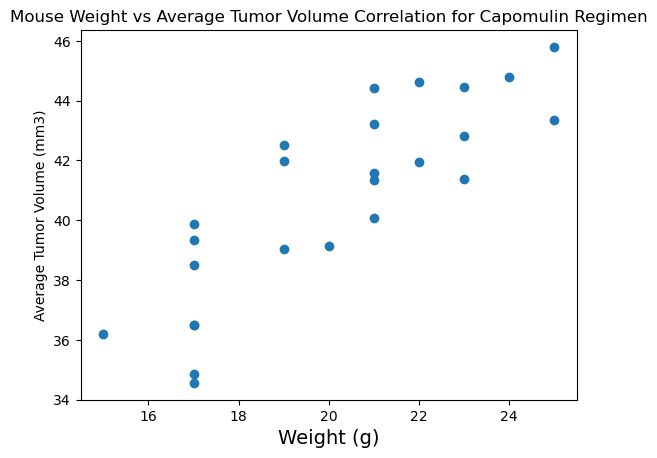

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
average_campomulin_volume = capomulin_mouse_treatment_data.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

marker_size=12
plt.scatter(average_campomulin_volume['Weight (g)'], average_campomulin_volume['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume Correlation for Capomulin Regimen')

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.84


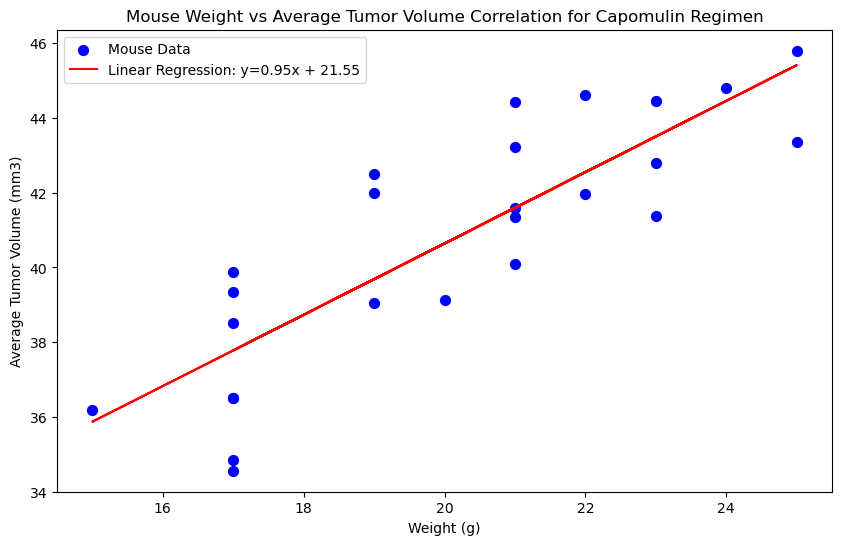

In [163]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
average_campomulin_data = capomulin_mouse_treatment_data.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

x_values = average_campomulin_data['Weight (g)']
y_values = average_campomulin_data['Tumor Volume (mm3)']

correlation_coefficient, _ = st.pearsonr(x_values, y_values)
print(f'Correlation coefficient between mouse weight and average tumor volume: {correlation_coefficient:.2f}')

slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)

regression_line = slope * x_values + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color="blue", s=50, label='Mouse Data')
plt.plot(x_values, regression_line, color="red", label=f'Linear Regression: y={slope:.2f}x + {intercept:.2f}')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume Correlation for Capomulin Regimen')
plt.legend()

plt.show()